# Transformers para geração de textos com gpt2
* Código realizado no Google Colab

In [20]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-d7ksdtc3
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-d7ksdtc3
  Resolved https://github.com/huggingface/transformers to commit 397a5ede33863d6f7137c771a68d40036cac0396
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [21]:
!pip install jupyterlab ipywidgets bertviz xformers evaluate matplotlib

---
# **Tokenização**

* ## Importação das ferramentas principais:
    * ### Aqui importamos duas partes essenciais da biblioteca transformers da Hugging Face: o BertModel (modelo em si) e o BertTokenizer (tokenizador).
    * ### O modelo precisa receber os dados em um formato específico — tokens — e o tokenizer é responsável por essa preparação. Sem ele, o texto não seria compreendido pelo modelo.
---
* ## Escolha do modelo pré-treinado
    * ### O nome "bert-base-uncased" refere-se a uma versão específica do BERT treinada com textos em letras minúsculas (uncased).
    * ### Definir o modelo permite carregar seus pesos e seu vocabulário específico, garantindo compatibilidade entre tokenizer e modelo.
---

* ## Carregamento do tokenizador correspondente ao modelo escolhido:
tokenizer = BertTokenizer.from_pretrained(modelName)

    * ### Com essa linha, estamos baixando e carregando automaticamente o tokenizer treinado junto com o bert-base-uncased. Cada modelo tem um vocabulário próprio; usar o tokenizer certo garante que as palavras sejam convertidas corretamente em IDs.
---
* ## Carregamento do modelo BERT pré-treinado
model = BertModel.from_pretrained(modelName)

    * ### Aqui carregamos os pesos e a arquitetura do modelo bert-base-uncased. Ele estará pronto para gerar representações vetoriais do texto.
    * ### Isso permite usar o poder do modelo sem precisar treiná-lo do zero — ideal para tarefas como classificação, similaridade de texto, ou extração de embeddings.

In [22]:
from transformers import BertModel, BertTokenizer

modelName = "bert-base-uncased"

tokenizer = BertTokenizer.from_pretrained(modelName)
model = BertModel.from_pretrained(modelName)

In [23]:
tokenized = tokenizer("I read a good novel.")
print(tokenized)

{'input_ids': [101, 1045, 3191, 1037, 2204, 3117, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


In [24]:
tokens = tokenizer.convert_ids_to_tokens(tokenized["input_ids"])
print(tokens)

['[CLS]', 'i', 'read', 'a', 'good', 'novel', '.', '[SEP]']


---
# Positional Encoding

* ## Importação das bibliotecas
    * ### numpy para criar e manipular matrizes; matplotlib para visualizar os padrões de codificação.
---
* ## Função encodePositions
    * ### Gera a codificação posicional senoidal, com base no número de tokens e na profundidade dos vetores.
---
* ## Matriz de zeros
    * ### Estrutura inicial onde serão inseridos os valores de seno e cosseno para cada posição.
---
* ## Loops sobre tokens e dimensões
    * ### Preenche a matriz usando senos nas posições pares e cossenos nas ímpares, com escalas diferentes.
---
* ## Cálculo do denominador
    * ### Controla a frequência das ondas, permitindo que cada dimensão capture diferentes níveis de variação posicional.
---
* ## Retorno da matriz
    * ### Entrega a codificação posicional pronta para ser somada aos embeddings do modelo.
---
* ## Visualização com matshow
    * ### Exibe os padrões gerados, evidenciando as variações cíclicas ao longo das posições.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def encodePositions(num_tokens, depth, n=10000):
    positionalMatrix = np.zeros((num_tokens, depth))
    for row in range(num_tokens):
        for col in np.arange(int(depth/2)):
            denominator = np.power(n, 2*col/depth)
            positionalMatrix[row, 2*col] = np.sin(row/denominator)
            positionalMatrix[row, 2*col+1] = np.cos(row/denominator)
    return positionalMatrix

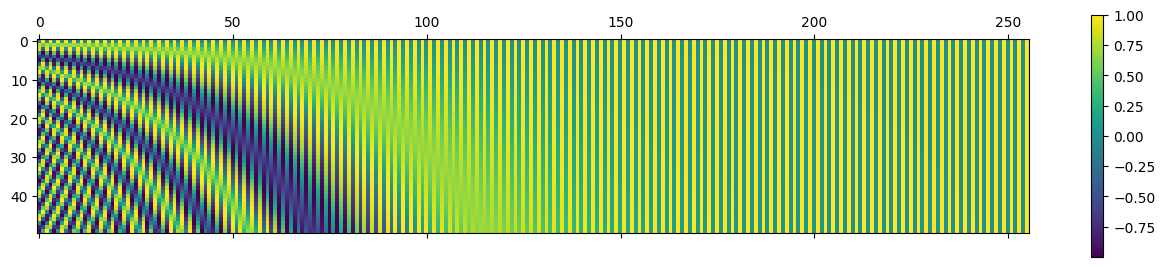

In [26]:
positionalMatrix = encodePositions(50, 256)
fig = plt.matshow(positionalMatrix)
plt.gcf().colorbar(fig)

---
# Self-Attention
* ## Permite que cada palavra da frase "preste atenção" em todas as outras, incluindo ela mesma.

* ## **Por que é importante**
    * ### Ajuda o modelo a entender contexto — por exemplo, que “novel” pode significar “livro” ou “novo” dependendo da frase.

* ## **Como funciona**
    * ### Calcula pesos de atenção entre pares de palavras; essas relações são usadas para atualizar as representações de cada token.

* ## **Resultado final**
    * ### Produz embeddings contextuais: cada vetor de palavra leva em conta o significado das outras na mesma frase.

In [27]:
from bertviz.transformers_neuron_view import BertModel, BertTokenizer
from bertviz.neuron_view import show

tokenizer_viz = BertTokenizer.from_pretrained(modelName)
model_viz = BertModel.from_pretrained(modelName)
show(model_viz, "bert", tokenizer_viz, "I read a good novel.", display_mode="light", head=11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
show(model_viz, "bert", tokenizer_viz, "Attention is a novel idea.", display_mode="light", head=11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Playground do Huggingface: https://huggingface.co/spaces/exbert-project/exbert

---
# GPT2 model (com 137M parâmetros)

* ## Importação do pipeline
    * ### Ferramenta da Hugging Face que simplifica o uso de modelos para tarefas comuns, como geração de texto.

* ## Criação do gerador
    * ### pipeline('text-generation', model='gpt2') cria um gerador de texto baseado no modelo GPT-2.

* ## Frase de entrada + max_length + num_return_sequences
    * ### Gera continuações para a frase fornecida, com no máximo max_length tokens e retorna num_return_sequences variações.

* ## Objetivo da geração
    * ### Avaliar como o modelo entende o contexto inicial e cria possíveis continuações coerentes.



In [29]:
from transformers import pipeline
generator = pipeline('text-generation', model='gpt2')
generator("I read a good novel.", max_length=30, num_return_sequences=5)


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I read a good novel.\n\nSo I started to look at the movie, my first novel, about an author I knew but had never read'},
 {'generated_text': 'I read a good novel. I read about many things but none of them I had never seen before. Then, having watched the game in my head'},
 {'generated_text': "I read a good novel.\n\nThere's just no book like that out there that you can recommend to your friends and family that you know you"},
 {'generated_text': 'I read a good novel. It made me feel like I had stumbled upon my own version of the world as well.\n\nWhy Is Your Mind'},
 {'generated_text': "I read a good novel. It's good. I think that's the only reason my brain got so bad.\n\nWhen I hear about an"}]

In [30]:
generator("This movie seemed really long.", max_length=300, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "This movie seemed really long.\n\nIt's not that I didn't plan. I was just thinking about the other stuff. What was funny was there are so many different kind of characters. It just came to me like, this is what I get for being a person. I have an advantage so I'm not as attached to them as I need to be.\n\nWho do you think is the most important character?\n\nLorenzo Cordero\n\nHe seems really important. The thing that I loved about him being in New Orleans is he came back here and didn't have the usual problems that you see in any city. There was a few people but he had problems. His parents went on vacation and he had to move back to France. He had so little money that he was having problems in France. It was really hard, to put it in his words. But he didn't put his money away and his father was in a job. So I really had to do the kind of things I had and look at a lot of my life through this lens.\n\nI've read many people who say to the movie, well, you guys did

In [31]:
generator("Star Trek" , max_length=100, num_return_sequences=5)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Star Trek: Deep Space Nine, and, for reasons that should be kept in mind, The Master of Orion's recent appearances on Star Trek: The Next Generation — which was filmed when he was still living out of his wheelchair, as well as one of his roles on Star Trek Into Darkness — were filmed on time, with only a small amount of rewrites that he'd had to spend the rest of the series writing or directing. However, the one role he hadn't wrote for was The"},
 {'generated_text': 'Star Trek: Enterprise - The Lost Frontier'},
 {'generated_text': 'Star Trek: Voyager - The Voyage Home\n\nStar Trek: Voyager - The Voyage Home Original Soundtrack\n\nStar Trek - The Voyage Home Theme Video:\n\nOriginal Star Trek - The Voyage Home - Original Music by Jason Bell\n\nOriginal Star Trek - The Voyage Home Theme Music Video:\n\nStar Trek - The Voyage Home 2 Music Video:\n\nStar Trek - The Voyage Home 10th Anniversary\n\nStar Trek - The Voyage Home -'},
 {'generated_text': 'Star Trek: The Nex

---
# LIMITAÇÕES ENCONTRADAS
* ## **O código abaixo é projetado para rodar GPT-2 Large para geração de texto**. No entanto, devido ao tamanho do modelo, ele exige muitos recursos de processamento e memória. Portanto, é recomendável rodá-lo em uma máquina com GPU dedicada ou no Google Colab Pro, onde você terá acesso a GPUs de alto desempenho, como a Tesla T4 ou V100, que são muito mais rápidas do que a CPU.
* ## Caso queira tenha esses requisitos, **descomente o código abaixo** para testar.

---
# GPT2-Large model (com 812M parâmetros)

* ## Versão maior do GPT-2, com mais capacidade de aprendizado e geração de textos mais sofisticados.

* ## Troca do modelo no pipeline
    * ### Usa 'gpt2-large' no lugar do padrão (gpt2), mantendo a mesma estrutura de chamada.

* ## Por que usar o modelo maior
    * ### Captura padrões linguísticos mais complexos, gera textos mais coerentes e com maior fluidez.

* ## Mesma frase de entrada
    * ### Permite comparar a qualidade e a criatividade das gerações entre versões do modelo.

In [32]:
# generator = pipeline('text-generation', model='gpt2-large')
# generator("I read a good novel.", max_length=30, num_return_sequences=5)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I read a good novel. I saw a good play. I ate a good meal. I had a good night's sleep. (He does not"},
 {'generated_text': "I read a good novel. I'd done that before - the novels by Stephen King, the ones that did it brilliantly and the ones by Stephen King"},
 {'generated_text': 'I read a good novel. Some of it was from my childhood, but there was a story that I loved, a piece of it I could have'},
 {'generated_text': 'I read a good novel.\n\nNow, I want to get back on track with the list, because I have two things to cover that are'},
 {'generated_text': 'I read a good novel. I read several books on the subject with the same basic result. The only thing that could be said of them without being'}]

---
## Fine-Tuning GPT2

    wget run_clm.py
* ### Baixa o script oficial da Hugging Face para fine-tuning de modelos com causal language modeling (CLM).
---
    pip install transformers[torch]
* ### Garante que os pacotes necessários para treinar com PyTorch estejam instalados.
---
    python run_clm.py ...
* ### Comando que treina o GPT-2 no dataset IMDb (críticas de filmes), com batch size de 8 e avaliação habilitada.
---
    output_dir=/tmp/test-clm
* ### Define onde o modelo treinado será salvo para uso posterior.
---
* ## Importação do modelo treinado
    * ### Usa GPT2LMHeadModel e GPT2Tokenizer a partir da pasta com os pesos ajustados.

* ## Criação do pipeline
    * ### Permite gerar texto com o modelo fine-tuned, agora com conhecimento adaptado ao estilo IMDb.

* ## Frases de teste
    * ### Avaliam se o modelo aprendeu padrões típicos de resenhas de filmes ou expressões relacionadas.

In [33]:
# !wget https://raw.githubusercontent.com/huggingface/transformers/main/examples/pytorch/language-modeling/run_clm.py

In [34]:
# !pip install transformers[torch]

In [35]:
# !pip install transformers datasets

In [36]:
# !python run_clm.py \
#     --model_name_or_path gpt2 \
#     --dataset_name wikitext \
#     --dataset_config_name wikitext-103-v1 \
#     --per_device_train_batch_size 8 \
#     --per_device_eval_batch_size 8 \
#     --do_train \
#     --do_eval \
#     --output_dir /tmp/test-clm \
#     --overwrite_output_dir

In [37]:
# from transformers import pipeline
# from transformers import GPT2Tokenizer, GPT2LMHeadModel

# dir = "/tmp/test-clm"
# generator = pipeline('text-generation', model=GPT2LMHeadModel.from_pretrained(dir), tokenizer=GPT2Tokenizer.from_pretrained(dir))
# generator("I read a good novel.", max_length=30, num_return_sequences=5)

In [38]:
# generator("This movie seemed really long.", max_length=300, num_return_sequences=5)


In [39]:
# generator("Star Trek", max_length=100, num_return_sequences=5)
